In [1]:
# load packages
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'1.12.0'

In [2]:
# sample data
x_train = np.arange(1000, step=0.1)
x_train = x_train.reshape((len(x_train), 1))
y_train = x_train + 20 * np.sin(x_train / 10)
y_train = y_train.reshape((len(y_train), 1))

In [3]:
x_train.shape, y_train.shape

((10000, 1), (10000, 1))

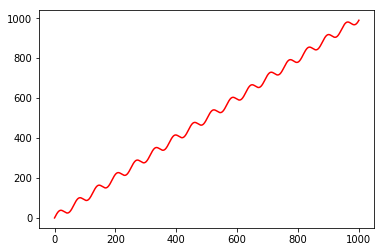

In [4]:
plt.plot(x_train, y_train, c="red")
plt.show()

In [5]:
num_samples = x_train.shape[0]
batch_size = 100

In [6]:
num_samples

10000

In [7]:
# define placeholders for input
x = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [8]:
# define variables to be learned
w = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
b = tf.get_variable("bias", (1, 1), initializer=tf.constant_initializer(0.0))

In [9]:
# prediction
y_pred = np.add(np.multiply(x, w), b)

# loss function
loss = tf.reduce_mean(tf.square(tf.subtract(y_pred, y)))

In [10]:
optimizer = tf.train.AdamOptimizer().minimize(loss) # set optimizer

In [11]:
iterations = 5000
with tf.Session() as sess:
    # initialize variables in graph
    sess.run(tf.global_variables_initializer())
    # iterations
    for step_idx in range(1, iterations+1):
        # select random mini-batch
        indices = np.random.choice(num_samples, batch_size)
        x_batch, y_batch = x_train[indices], y_train[indices]
        _, loss_val = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
        if step_idx > 1:
            if loss_val < prev_loss:
                w_val, b_val = sess.run([w, b])
                print("Index", step_idx, "->", "Loss Decreased:", loss_val)
                print()
                prev_loss = loss_val
        else:
            prev_loss = loss_val

Index 2 -> Loss Decreased: 1733755.9

Index 10 -> Loss Decreased: 1658009.1

Index 39 -> Loss Decreased: 1567911.5

Index 73 -> Loss Decreased: 1390565.5

Index 128 -> Loss Decreased: 1193951.5

Index 344 -> Loss Decreased: 1132258.1

Index 407 -> Loss Decreased: 1094846.9

Index 446 -> Loss Decreased: 1030191.06

Index 533 -> Loss Decreased: 1020672.25

Index 536 -> Loss Decreased: 998142.4

Index 565 -> Loss Decreased: 993921.2

Index 593 -> Loss Decreased: 985792.0

Index 601 -> Loss Decreased: 972643.5

Index 626 -> Loss Decreased: 912385.1

Index 657 -> Loss Decreased: 905624.56

Index 664 -> Loss Decreased: 877723.8

Index 707 -> Loss Decreased: 857290.6

Index 732 -> Loss Decreased: 833292.06

Index 741 -> Loss Decreased: 823925.44

Index 753 -> Loss Decreased: 818666.75

Index 827 -> Loss Decreased: 818146.9

Index 842 -> Loss Decreased: 743728.8

Index 872 -> Loss Decreased: 734730.0

Index 917 -> Loss Decreased: 730583.1

Index 926 -> Loss Decreased: 708732.4

Index 952 -> Lo

In [12]:
w_val, b_val

(array([[0.9870746]], dtype=float32), array([[2.4200003]], dtype=float32))

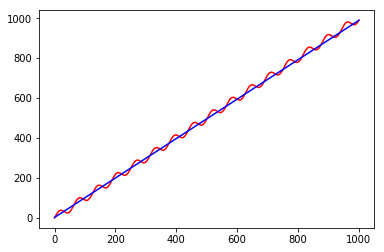

In [13]:
# test sample
x_test = x_train
y_test = x_test * np.float(w_val) + np.float(b_val)

# visualize results
plt.plot(x_train, y_train, c="red")
plt.plot(x_test, y_test, c="blue")
plt.show()

As expected since the model is a linear in nature, the prediction is linear and did not get the non-linear nature of the data.